In [1]:
# %matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read csv
exams = pd.read_csv('student_performance.csv')


In [3]:
exams.head()


,gender,ethnicity,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = exams[['gender','ethnicity','parent_edu','lunch','test_prep']]
y = exams['writing_score'].values.reshape(-1,1)
print(X.shape, y.shape)

(1000, 5) (1000, 1)


In [5]:
data = X.copy()
data_binary_encoded = pd.get_dummies(data)

In [6]:
data_binary_encoded.head()

,gender_female,gender_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parent_edu_associate's degree,parent_edu_bachelor's degree,parent_edu_high school,parent_edu_master's degree,parent_edu_some college,parent_edu_some high school,lunch_free/reduced,lunch_standard,test_prep_completed,test_prep_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [7]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80)

X_train.head()

,gender_female,gender_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parent_edu_associate's degree,parent_edu_bachelor's degree,parent_edu_high school,parent_edu_master's degree,parent_edu_some college,parent_edu_some high school,lunch_free/reduced,lunch_standard,test_prep_completed,test_prep_none
969,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
785,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
744,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
394,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
235,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1


In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

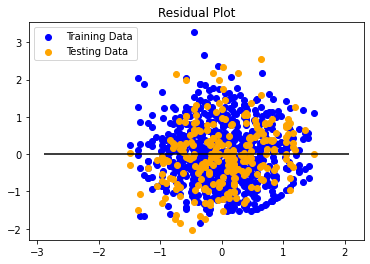

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
r2 = model.score(X_test_scaled, y_test_scaled)

In [12]:
print(f"R2: {r2}")

R2: 0.20086213164347844


In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)
rf.score(X,y)

<ipython-input-14-f57f0f284177>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(X, y)


0.263

In [15]:
importances = rf.feature_importances_
importances

array([0.03993926, 0.03643633, 0.06511309, 0.07018176, 0.08214838,
       0.07629788, 0.07187551, 0.07492669, 0.05837788, 0.06221384,
       0.04537881, 0.0717264 , 0.06770397, 0.05236344, 0.05208991,
       0.03645978, 0.03676706])

In [16]:
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.08214838461594559, 'ethnicity_group C'),
 (0.07629788383737496, 'ethnicity_group D'),
 (0.0749266851585466, "parent_edu_associate's degree"),
 (0.07187551298039542, 'ethnicity_group E'),
 (0.0717264013252956, 'parent_edu_some college'),
 (0.0701817603439432, 'ethnicity_group B'),
 (0.06770397335312164, 'parent_edu_some high school'),
 (0.06511309247304377, 'ethnicity_group A'),
 (0.062213843679558865, 'parent_edu_high school'),
 (0.05837787571449267, "parent_edu_bachelor's degree"),
 (0.05236343876243556, 'lunch_free/reduced'),
 (0.052089908721549755, 'lunch_standard'),
 (0.045378812225283435, "parent_edu_master's degree"),
 (0.03993925792769766, 'gender_female'),
 (0.036767060578180584, 'test_prep_none'),
 (0.03645978031934214, 'test_prep_completed'),
 (0.036436327983792614, 'gender_male')]

In [17]:
features = sorted(zip(rf.feature_importances_, X), reverse=True)

In [18]:
df = pd.DataFrame(features)
df.head(50)

,0,1
0,0.082148,ethnicity_group C
1,0.076298,ethnicity_group D
2,0.074927,parent_edu_associate's degree
3,0.071876,ethnicity_group E
4,0.071726,parent_edu_some college
5,0.070182,ethnicity_group B
6,0.067704,parent_edu_some high school
7,0.065113,ethnicity_group A
8,0.062214,parent_edu_high school
9,0.058378,parent_edu_bachelor's degree


In [19]:
df = df.rename(columns = {0:'Importance',
                    1:'Features'})

In [20]:
df

,Importance,Features
0,0.082148,ethnicity_group C
1,0.076298,ethnicity_group D
2,0.074927,parent_edu_associate's degree
3,0.071876,ethnicity_group E
4,0.071726,parent_edu_some college
5,0.070182,ethnicity_group B
6,0.067704,parent_edu_some high school
7,0.065113,ethnicity_group A
8,0.062214,parent_edu_high school
9,0.058378,parent_edu_bachelor's degree
